In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Butovskaya_feb.csv', sep=";")
df.head()

,date_and_time,id_lobby,num_ticket,type_passage
0,2020-02-01T09:57:24,2010,14700883,0
1,2020-02-01T09:57:36,2010,20160281,0
2,2020-02-01T09:57:29,2010,20160281,0
3,2020-02-01T09:57:43,2010,3230566,0
4,2020-02-01T09:57:52,2010,6116881,0


In [3]:
df['date_and_time'] = pd.to_datetime(df['date_and_time'])

## Группировка на интервалы по 15 минут

In [4]:
df.set_index('date_and_time', inplace=True)

In [5]:
# группируем на интервалы по 15 минут
df_resampled = df.groupby(pd.Grouper(freq='D'), as_index=False).apply(lambda x: x.resample('15T').count()).reset_index()

In [6]:
df_resampled.rename(columns={'num_ticket': 'passengers','date_and_time': 'date'}, inplace=True)
df_resampled.drop(['type_passage', 'id_lobby', 'level_0'], axis=1, inplace=True)

In [7]:
# убиарем ппропущенные значения
df_resampled.dropna(inplace=True)

In [8]:
df_resampled.head()

,date,passengers
0,2020-02-01 05:45:00,3
1,2020-02-01 06:00:00,0
2,2020-02-01 06:15:00,2
3,2020-02-01 06:30:00,4
4,2020-02-01 06:45:00,9


## Группировка по временному промежутку 5:45 - 6:00

In [9]:
df_resampled.set_index('date', inplace=True)

In [10]:
df_daily = df_resampled.between_time('05:45:00', '06:00:00').groupby(pd.Grouper(freq='D')).sum().reset_index()

In [11]:
df_daily.head()

,date,passengers
0,2020-02-01,3
1,2020-02-02,492
2,2020-02-03,1814
3,2020-02-04,1792
4,2020-02-05,1729


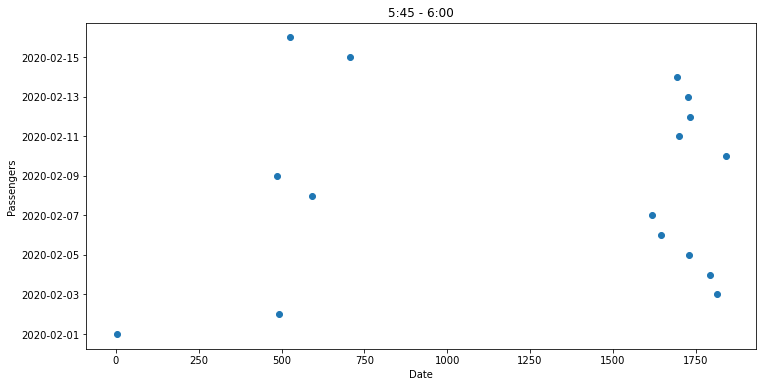

In [12]:
plt.figure(figsize=(12,6))

plt.scatter(df_daily['passengers'], df_daily['date'])

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('5:45 - 6:00')

plt.show()

## Обучение модели

In [13]:
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(df_daily[['passengers']])

# предсказание выбросов
outliers = model.predict(df_daily[['passengers']])

# добавление столбца с метками выбросов в исходный датафрейм
df_daily['outlier'] = outliers
df_daily

,date,passengers,outlier
0,2020-02-01,3,-1
1,2020-02-02,492,1
2,2020-02-03,1814,1
3,2020-02-04,1792,1
4,2020-02-05,1729,1
5,2020-02-06,1646,1
6,2020-02-07,1617,1
7,2020-02-08,593,1
8,2020-02-09,485,1
9,2020-02-10,1840,1


## Результат работы Isolation Forest на интервале 5:45 - 6:00


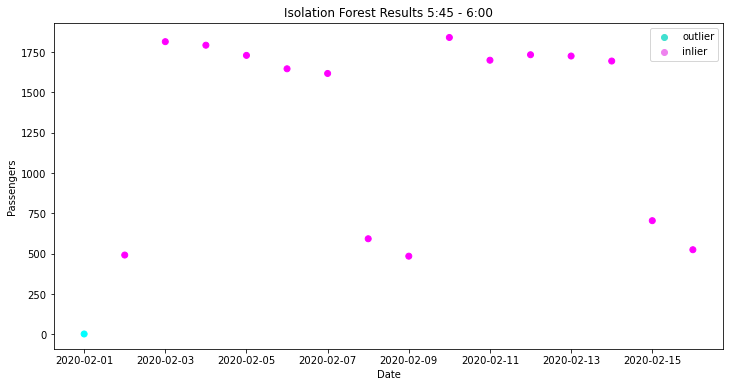

In [14]:
plt.figure(figsize=(12, 6))

plt.scatter(df_daily['date'], df_daily['passengers'], c=df_daily['outlier'], cmap='cool')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Isolation Forest Results 5:45 - 6:00')

# добавление легенды
handles = [plt.scatter([], [], color='turquoise', label='outlier'),
           plt.scatter([], [], color='violet', label='inlier')]
plt.legend(handles=handles)

# вывод графика
plt.show()

## Группировка по временному промежутку 12:45 - 13:00


In [15]:
df_daily = df_resampled.between_time('12:45:00', '13:00:00').groupby(pd.Grouper(freq='D')).sum().reset_index()

In [16]:
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(df_daily[['passengers']])

# предсказание выбросов
outliers = model.predict(df_daily[['passengers']])

# добавление столбца с метками выбросов в исходный датафрейм
df_daily['outlier'] = outliers
df_daily

,date,passengers,outlier
0,2020-02-01,1880,1
1,2020-02-02,1559,1
2,2020-02-03,1560,1
3,2020-02-04,1589,1
4,2020-02-05,1587,1
5,2020-02-06,1775,1
6,2020-02-07,1591,1
7,2020-02-08,1899,1
8,2020-02-09,1687,1
9,2020-02-10,1612,1


## Результат работы Isolation Forest на интервале 12:45 - 13:00

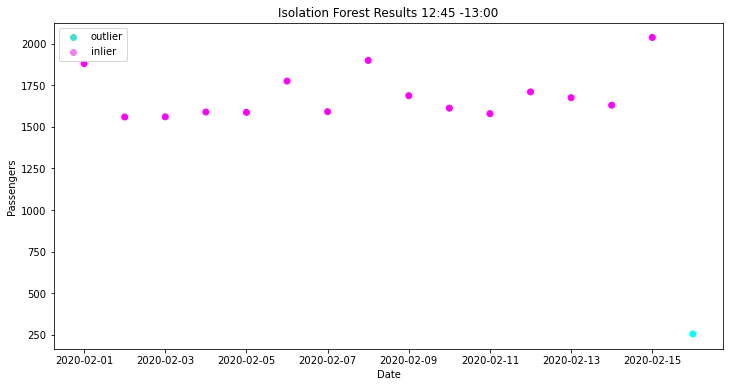

In [17]:
plt.figure(figsize=(12, 6))

plt.scatter(df_daily['date'], df_daily['passengers'], c=df_daily['outlier'], cmap='cool')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Isolation Forest Results 12:45 -13:00')

# добавление легенды
handles = [plt.scatter([], [], color='turquoise', label='outlier'),
           plt.scatter([], [], color='violet', label='inlier')]
plt.legend(handles=handles)

# вывод графика
plt.show()